In [ ]:
!pip install -e git+https://github.com/changyaochen/rbo.git@master#egg=rbo

In [7]:
import rbo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import log as ln

In [19]:
### Calculate the p
p = 0.8
d = 5
# get terms
log_term = np.log(1/(1-p))
sum_term = 0
divisor_term = (1-p)/p
first_term = 1-(p**(d-1))
for i in range(1,d):
    sum_term = sum_term + (p**i)/(i)
    
Wrbo = first_term + (divisor_term)*d*(log_term-sum_term)

## looks like p = 0.8, d=5 gives 86% weight on first 5 terms
print(Wrbo)

0.8608640572092918


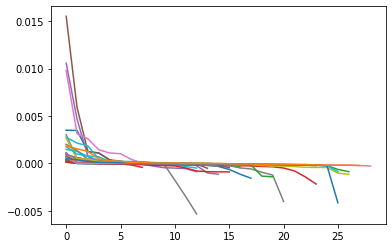

In [21]:
# Read shap validation files
lstm_att = pd.read_pickle('shap_values/lstm-att/val_shap_00.pkl')
lstm = pd.read_pickle('shap_values/lstm/val_shap_00.pkl')

similarity_list = []
# Loop through shap data
for index, item in enumerate(lstm_att[0]):
    # Get list of features and scores for each patient
    lstm_att_features = lstm_att[0][index]
    lstm_att_scores = lstm_att[1][index]
    lstm_features = lstm[0][index]
    lstm_scores = lstm[1][index]
    
    # Convert the data into the dataframe
    # features
    df_lstm_att = pd.DataFrame(lstm_att_features, columns = ['features'])
    df_lstm_att['scores'] = lstm_att_scores
    
    # shap scores
    df_lstm = pd.DataFrame(lstm_features, columns = ['features'])
    df_lstm['scores'] = lstm_scores
    
    # indices
    df_lstm_att['index'] = np.arange(df_lstm_att.shape[0])
    df_lstm['index'] = np.arange(df_lstm.shape[0])
    
    # Order the dataframe by score, descending order
    df_lstm = df_lstm.sort_values(by=['scores'], ascending=False)
    df_lstm_att = df_lstm_att.sort_values(by=['scores'], ascending=False)
    
    # Convert back to list
    o_lstm_att = df_lstm_att['index'].tolist()
    o_lstm = df_lstm['index'].tolist()
    
    similarity = rbo.RankingSimilarity(o_lstm, o_lstm_att).rbo()
    similarity_list.append(similarity)
    
    
    # Plot scores distribution
    plt.plot(df_lstm['scores'].tolist())

(0.0, 10.0)

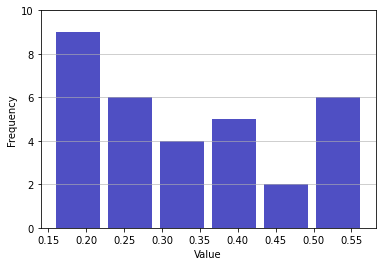

In [22]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=similarity_list, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 2)